# Problem Statement

Imagine you’re working as a data scientist tasked with creating a **predictive model** that can **classify a set of plant species based on certain measurements**

AIM:
The project involves various stages in a typical machine learning pipeline, where each stage utilizes a different scikit-learn API component. Let’s dive into the process step-by-step.

# Load Data

Let's start by loading the data, the Iris dataset, which contains information about different flower species.

Our goal is to build a model that can predict the species (target) based on sepal and petal dimensions (features).

In [ ]:
# loaad iris dataset from sklearn using dataset api
from sklearn.datasets import load_iris

data = load_iris()

X,y = data.data, data.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 2. Preprocess Data

Next, we prepare the data for modeling. Raw data often needs:
* scaling,
* normalization, or transformation

for optimal model performance.

Here, we use **StandardScaler** to standardize our feature set, making
 sure each feature has a mean of zero and a standard deviation of one. This helps algorithms interpret feature importance uniformly.

In [ ]:
# use standard scaler to standariase dataset from preprocessing module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# 3. Handle Missing Values

Occasionally, data may have missing values due to incomplete records.

To simulate this, we introduce a missing value into our dataset and use SimpleImputer to fill it with the mean of the respective column.

This ensures that our model can work with a complete dataset.

In [ ]:
# introduce missing values - base python code
import numpy as np
X_scaled[0,0] = np.nan
X_scaled

In [ ]:
# impute them using impute module
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X_scaled)

In [ ]:
X_imputed

array([[ 6.04484007e-03,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# 4. Select Key Features (Feature Selection)

Next, we reduce the dimensionality of our data by selecting the most relevant features using **SelectKBest**.

This step improves model performance and reduces computational load by focusing only on features that contribute the most to the prediction.

In [ ]:
# impiort module from feature_selection api
from sklearn.feature_selection import SelectKBest

In [ ]:
# intialise SelectKBest Object
selector = SelectKBest(k=2)

In [ ]:
# fit the model
selector.fit(X_imputed,y)

SelectKBest(k=2)

In [ ]:
# transform data into k dimension
X_selected = selector.transform(X_imputed)

In [ ]:
# get top feature names
selected_feature_names = [data.feature_names[i] for i in selector.get_support(indices=True)]

In [ ]:
selected_feature_names

['petal length (cm)', 'petal width (cm)']

# 5. Handle Multioutput Case

In some cases, we need to predict multiple outputs for each sample.

Here, we simulate this by creating a duplicate of our target label, training a model that can predict both labels simultaneously.

**MultiOutputClassifier** lets us handle this kind of scenario seamlessly.

In [ ]:
# import modules from multioutput (classification)
from sklearn.multioutput import MultiOutputClassifier

# load logistic regression from linear_model
from sklearn.linear_model import LogisticRegression

In [ ]:
# train model
model = MultiOutputClassifier(LogisticRegression()).fit(X_selected,
                                                        np.column_stack((y,y)))

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
# get output
model.predict(X_selected)


# 6. Clustering Analysis

Before we proceed with classification, we might want to explore any natural groupings in our data.

We use **Agglomerative Clustering** here to cluster the data into groups based on feature similarity.

Although this is an unsupervised technique, clustering can reveal hidden structure in the data.

In [ ]:
# load module from cluster api
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# train and predict on the data
cluster = AgglomerativeClustering(n_clusters=3).fit(X_selected)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0])

# 7. Model Selection and Training

For the classification task, we choose **Logistic Regression** as our base model.

We use **GridSearchCV** to find the best hyperparameters, ensuring our model is optimized.

Additionally, **cross_val_score** provides a measure of our model’s performance consistency across different data splits.

In [ ]:
# load grid search cv, cross val score, train test split from model _selection
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

# load logistic regression - optional
from sklearn.linear_model import LogisticRegression

In [ ]:
# split the data using train test split into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) # 80% , 20% testing

In [ ]:
# define the model
model = LogisticRegression()

In [ ]:
# create parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# intatiate grid search cv object
grid_search = GridSearchCV(model, param_grid, cv=5)

# fit the model
grid_search.fit(X_train, y_train)

# get the best estimator
best_model = grid_search.best_estimator_

In [ ]:
best_model

LogisticRegression(C=0.1)

# 8. Evaluate Model Performance

With our model trained, we now evaluate its **accuracy, precision, recall, and F1 score** using metrics module.

These metrics provide insight into the model’s performance and whether it's balanced across all classes.

In [ ]:
# import all scoring fn from the metrics module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# predict the data ans store
y_pred = best_model.predict(X_test)

In [ ]:
# print different scoring function by comparing agaist actual and predicted
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# 9. Interpret Model - Feature Importance and Dependence (Reiteration)

Finally, we use **permutation importance from sklearn.inspection** to identify *which features most affect the model’s predictions*.

Additionally, we visualize **partial dependence plots** to understand how specific features impact predictions, providing transparency in our model’s decision-making process.

In [ ]:
# import premutation_importance and PartialDependenceDisplay from inspection api
from sklearn.inspection import permutation_importance , PartialDependenceDisplay

# import matplotlib
import matplotlib.pyplot as plt


# import tree based ml algorithm, we choose - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# get permutation importance by providing estimatior, test set
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
print("Feature importances:", result.importances_mean)

Feature importances: [0.48333333 0.48      ]


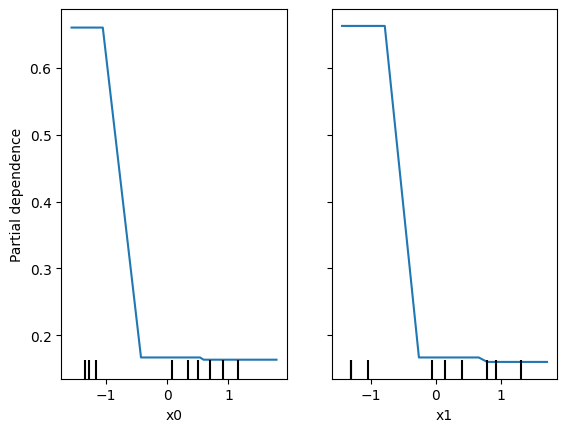

In [ ]:
# plot the data using random forest classifier and partial dependence plot
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
target_class = 0
display = PartialDependenceDisplay.from_estimator(rf, X_selected, features=[0, 1], target = target_class)
plt.show()

---

# 10. Summary

* **sklearn.datasets**: Loaded with load_iris.
* **sklearn.preprocessing**: Standard scaling, min-max scaling, normalization, binarization.
* **sklearn.impute**: Imputed missing values using SimpleImputer.
* **sklearn.feature_selection**: Selected top features with SelectKBest.
* **sklearn.linear_model**: Logistic Regression model.
* **sklearn.tree**: Used RandomForestClassifier for partial dependence.
* **sklearn.multiclass**: Implicitly supported via multi-class strategy of LogisticRegression.
* **sklearn.multioutput**: Demonstrated with MultiOutputClassifier.
* sklearn.cluster: Used AgglomerativeClustering.
* sklearn.metrics: Expanded to include precision_score, recall_score, and f1_score.
* sklearn.model_selection: Used train_test_split, cross_val_score, and GridSearchCV.
* sklearn.inspection: Used both permutation_importance and PartialDependenceDisplay.


This example code now integrates each specified component in a cohesive pipeline, connecting each step logically in the ML workflow.

# Resources

1. **Datasets**: [https://scikit-learn.org/stable/api/sklearn.datasets.html](https://scikit-learn.org/stable/api/sklearn.datasets.html)
2. **Preprocessing**: [https://scikit-learn.org/stable/api/sklearn.preprocessing.html](https://scikit-learn.org/stable/api/sklearn.preprocessing.html)
3. **Impute**: [https://scikit-learn.org/stable/api/sklearn.impute.html](https://scikit-learn.org/stable/api/sklearn.impute.html)
4. **Feature Selection**: [https://scikit-learn.org/stable/api/sklearn.feature_selection.html](https://scikit-learn.org/stable/api/sklearn.feature_selection.html)
5. **Feature Reduction**: [https://scikit-learn.org/stable/api/sklearn.decomposition.html](https://scikit-learn.org/stable/api/sklearn.decomposition.html)
6. **Supervised Learning**: [https://scikit-learn.org/stable/supervised_learning.html](https://scikit-learn.org/stable/supervised_learning.html)
7. **Unsupervised Learning**: [https://scikit-learn.org/stable/unsupervised_learning.html](https://scikit-learn.org/stable/unsupervised_learning.html)
8. **Model Selection**: [https://scikit-learn.org/stable/model_selection.html](https://scikit-learn.org/stable/model_selection.html)
9. **Model Evaluation**: [https://scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html)
10. **Model Inspection**: [https://scikit-learn.org/stable/inspection.html](https://scikit-learn.org/stable/inspection.html)



In [ ]:
# @title Subscribe, Share, Comment!
"Subscribe, Share, Comment!"

'Subscribe, Share, Comment!'